## CNN Implementation  
Covers question 3 from the assignment. Below are the steps it covers 
1. Downloads dataset from torchvision.datasets
2. Pre-process all the input data 
3. Train the model with 5 CNN layers and MaxPool the layers to extract features. 
4. Pass the features to the MLP model to complete the training with different hyperparameters 
5. Evaluate the model using test data on all the trained models 

In [1]:
%load_ext autoreload
%autoreload 2
from data_preparation import pre_process_dataset, prepare_dataset_dict
from mlp import compare_training_and_validation_loss
from cnn import cnn_test, cnn_train, load_data_to_cnn, save_model_to_a_file 


In [2]:
# data preparation for CNN
dataset_d= prepare_dataset_dict()
cnn_dataset_dict = pre_process_dataset(dataset_d, flatten=False)
torch_datasets = load_data_to_cnn(cnn_dataset_dict)

-------------------------TRAIN DATA---------------------------------
Available Training dataset contains 60,000 images.
Each image is of size 28x28
Each image is labelled one of: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Each image pixel values are between 0 and 255
---------------------------------------------------------------------
------------------------- TRAIN DATA After Split -----------------------
Final Training dataset shape: (52800, ',') images of 28x28
Final Validation dataset shape: (7200, ',') images of 28x28
---------------------------------------------------------------------
------------------------- TEST DATA ---------------------------------
Test dataset contains 10,000 images.
Each image is of size 28x28
Each image is labelled one of: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Each image pixel values are between 0 and 255
-----------------

100%|██████████| 3/3 [00:00<00:00, 145.41it/s]


In [7]:
#CNN__32_64_128_256_kernel_3__mlp__layers__128_64_32__lr_0.01__epoch_50
input_size = 512  # Flattened size from the CNN feature map output
hidden_layers = [512, 256, 128, 64, 32]  # Full connected layers for classification
num_epochs = 50
learning_rate = 0.1
activation_function = "relu"
initialisation_function = "He"
cnn_trained_dict, mlp_model, cnn_model = cnn_train(torch_datasets, input_size, hidden_layers, learning_rate, num_epochs, activation_function, initialisation_function)

Epoch [1/50], Training Loss: 2.1877  | Validation Loss: 1.9415
Epoch [2/50], Training Loss: 1.8721  | Validation Loss: 1.8882
Epoch [3/50], Training Loss: 1.7143  | Validation Loss: 1.4546
Epoch [4/50], Training Loss: 1.5870  | Validation Loss: 1.3179
Epoch [5/50], Training Loss: 1.5217  | Validation Loss: 1.4214
Epoch [6/50], Training Loss: 1.4270  | Validation Loss: 1.2138
Epoch [7/50], Training Loss: 1.4170  | Validation Loss: 1.4183
Epoch [8/50], Training Loss: 1.3955  | Validation Loss: 1.1694
Epoch [9/50], Training Loss: 1.3552  | Validation Loss: 1.2159
Epoch [10/50], Training Loss: 1.2868  | Validation Loss: 1.2290
Epoch [11/50], Training Loss: 1.2174  | Validation Loss: 1.0355
Epoch [12/50], Training Loss: 1.1616  | Validation Loss: 1.5705
Epoch [13/50], Training Loss: 1.2529  | Validation Loss: 1.2836
Epoch [14/50], Training Loss: 1.1638  | Validation Loss: 1.0177
Epoch [15/50], Training Loss: 1.2369  | Validation Loss: 1.2206
Epoch [16/50], Training Loss: 1.1922  | Validatio

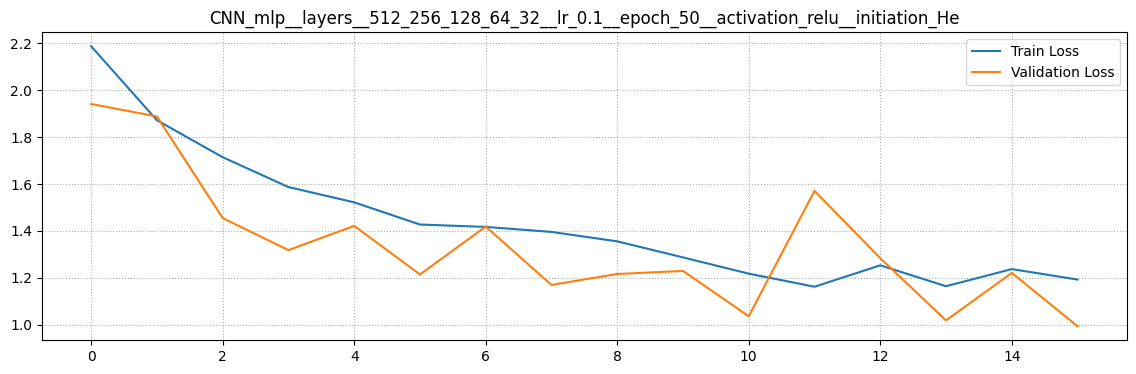

In [8]:
compare_training_and_validation_loss(cnn_trained_dict)

In [20]:
%reload_ext autoreload
cnn_test(cnn_dataset_dict, mlp_model, cnn_model) 

------------ Test Confusion Matrix ------------
[[1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]
 [1000    0    0    0    0    0    0    0    0    0]]
------------------------------------------------
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00     

/Users/sreeram.ganta/PycharmProjects/iitk/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sreeram.ganta/PycharmProjects/iitk/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/sreeram.ganta/PycharmProjects/iitk/.env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [8]:
#CNN without Normalisation
%reload_ext autoreload
input_size = 256  # Flattened size from the CNN feature map output
hidden_layers = [256, 128, 64, 32, 16]  # Full connected layers for classification
num_epochs = 10
learning_rate = 0.01
activation_function = "relu"
initialisation_function = "He"
cnn_trained_dict2, mlp_model2, cnn_model2 = cnn_train(torch_datasets, input_size, hidden_layers, learning_rate, num_epochs, activation_function, initialisation_function)

CNN Model details : CNNBackbone(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Epoch [1/10], Training Loss: 2.3003  | Validation Loss: 2.2967
Epoch [2/10], Training Loss: 2.2952  | Validation Loss: 2.2903
Epoch [3/10], Training Loss: 2.2839  | Validation Loss: 2.2696
Epoch [4/10], Training Loss: 2.2467  | Validation Loss: 2.1890
Epoch [5/10], Training Loss: 2.1229  | Validation Loss: 2.0021
Epoch [6/10], Training Loss: 1.9975  | Validation Loss: 2.1125
Epoch [7/10], Training Loss: 1.8812  | Validation Loss: 1.6933
Epoch [8/10], Training Loss: 1.8135  | Validation Lo

In [3]:
# With Normalisation
%reload_ext autoreload
input_size = 256  # Flattened size from the CNN feature map output
hidden_layers = [256, 128, 64, 32, 16]  # Full connected layers for classification
num_epochs = 10
learning_rate = 0.01
activation_function = "relu"
initialisation_function = "He"
cnn_trained_dict3, mlp_model3, cnn_model3 = cnn_train(torch_datasets, input_size, hidden_layers, learning_rate, num_epochs, activation_function, initialisation_function)

CNN Model details : CNNBackbone(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Epoch [1/10], Training Loss: 1.0982  | Validat

In [4]:
%reload_ext autoreload
input_size = 256  # Flattened size from the CNN feature map output
hidden_layers = [256, 128, 64, 32, 16]  # Full connected layers for classification
num_epochs = 100
learning_rate = 0.01
activation_function = "relu"
initialisation_function = "He"
cnn_trained_dict4, mlp_model4, cnn_model4 = cnn_train(torch_datasets, input_size, hidden_layers, learning_rate, num_epochs, activation_function, initialisation_function)

CNN Model details : CNNBackbone(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Epoch [1/100], Training Loss: 1.0955  | Valida

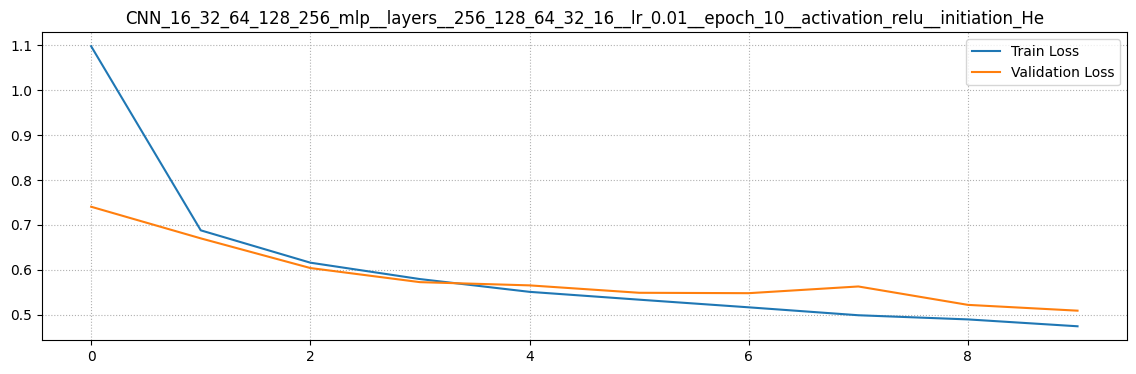

In [9]:
compare_training_and_validation_loss(cnn_trained_dict3)


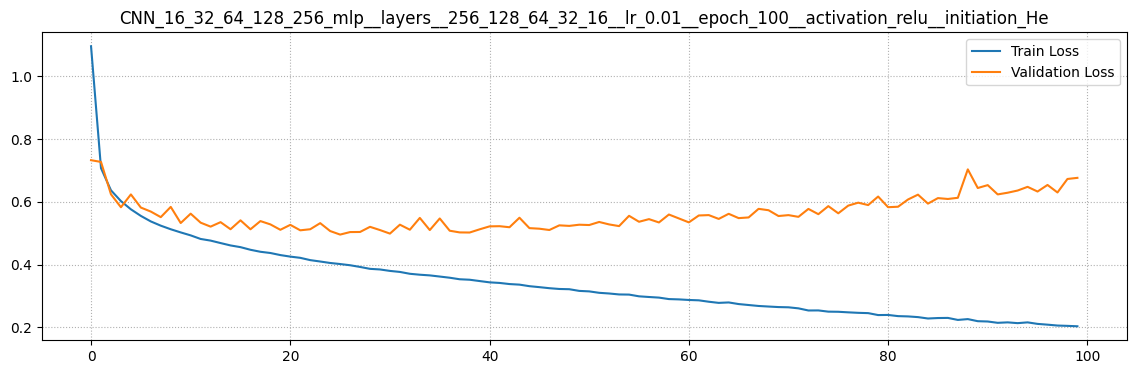

In [6]:
compare_training_and_validation_loss(cnn_trained_dict4)

In [10]:
%reload_ext autoreload
cnn_test(cnn_dataset_dict, mlp_model3, cnn_model3) 

------------ Test Confusion Matrix ------------
[[720   9  30  52  14   8 145   1  21   0]
 [  2 947  11  27   4   0   6   0   3   0]
 [ 15   3 689  11 140   1 132   0   9   0]
 [ 33  29   6 809  53   2  58   0   9   1]
 [  4   2  94  44 720   0 128   0   8   0]
 [  0   0   0   2   0 943   0  38   4  13]
 [147   4 101  40 123   1 561   0  23   0]
 [  0   0   0   0   0  97   0 832   1  70]
 [  2   1   4   3   1  20  15   3 950   1]
 [  0   0   0   0   0  39   1  33   0 927]]
------------------------------------------------
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.74      0.69      0.71      1000
           3       0.82      0.81      0.81      1000
           4       0.68      0.72      0.70      1000
           5       0.85      0.94      0.89      1000
           6       0

In [8]:
%reload_ext autoreload
cnn_test(cnn_dataset_dict, mlp_model4, cnn_model4) 

------------ Test Confusion Matrix ------------
[[764   2  40  75  16   3  92   0   8   0]
 [  2 945   2  35  11   0   3   0   2   0]
 [ 51   2 698  27 140   1  75   0   6   0]
 [ 26  19  15 875  38   0  27   0   0   0]
 [ 10   3 122  74 697   0  84   0  10   0]
 [  3   0   0   3   0 913   1  57   6  17]
 [165   2 126  71 135   1 478   0  22   0]
 [  1   0   0   0   0  49   0 900   2  48]
 [ 10   1   7  10   9   8  12   3 937   3]
 [  3   0   0   1   1  19   0  57   0 919]]
------------------------------------------------
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1000
           1       0.97      0.94      0.96      1000
           2       0.69      0.70      0.69      1000
           3       0.75      0.88      0.81      1000
           4       0.67      0.70      0.68      1000
           5       0.92      0.91      0.92      1000
           6       0

In [11]:
# With Normalisation
%reload_ext autoreload
input_size = 256  # Flattened size from the CNN feature map output
hidden_layers = [256, 128, 64, 32, 16]  # Full connected layers for classification
num_epochs = 10
learning_rate = 0.01
activation_function = "relu"
initialisation_function = "Xavier"
cnn_trained_dict5, mlp_model5, cnn_model5 = cnn_train(torch_datasets, input_size, hidden_layers, learning_rate, num_epochs, activation_function, initialisation_function)

CNN Model details : CNNBackbone(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Epoch [1/10], Training Loss: 1.2311  | Validat

In [12]:
# With Normalisation
%reload_ext autoreload
input_size = 256  # Flattened size from the CNN feature map output
hidden_layers = [256, 128, 64, 32, 16]  # Full connected layers for classification
num_epochs = 50
learning_rate = 0.01
activation_function = "relu"
initialisation_function = "Xavier"
cnn_trained_dict6, mlp_model6, cnn_model6 = cnn_train(torch_datasets, input_size, hidden_layers, learning_rate, num_epochs, activation_function, initialisation_function)

CNN Model details : CNNBackbone(
  (conv1): Conv2d(1, 16, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)
Epoch [1/50], Training Loss: 1.3394  | Validat

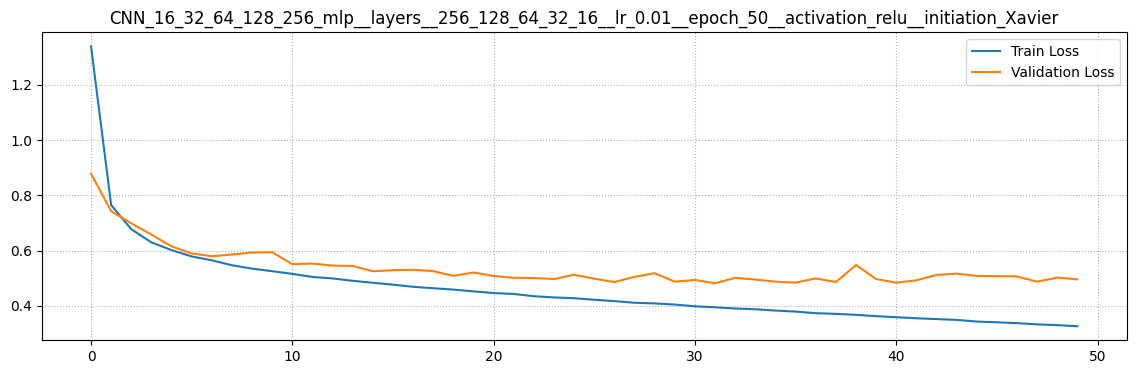

In [13]:
compare_training_and_validation_loss(cnn_trained_dict6)

In [15]:
%reload_ext autoreload
cnn_test(cnn_dataset_dict, mlp_model6, cnn_model6) 

------------ Test Confusion Matrix ------------
[[734   2  45  48  18   2 125   1  23   2]
 [  3 953   3  29   4   0   5   0   3   0]
 [ 15  10 726   7 119   0 115   0   8   0]
 [ 28  22  28 828  42   2  38   0  12   0]
 [  2   1 152  40 666   0 125   0  14   0]
 [  0   1   0   0   1 848   1 120   7  22]
 [128   3 119  46 106   0 573   1  24   0]
 [  0   0   0   0   0  18   0 930   0  52]
 [  5   0   8   5   5   2  12   5 956   2]
 [  0   0   0   0   0   6   1  70   1 922]]
------------------------------------------------
------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1000
           1       0.96      0.95      0.96      1000
           2       0.67      0.73      0.70      1000
           3       0.83      0.83      0.83      1000
           4       0.69      0.67      0.68      1000
           5       0.97      0.85      0.90      1000
           6       0

In [19]:
cnn_model6.model_name = cnn_trained_dict6['model_name'] 
save_model_to_a_file(cnn_trained_dict6, cnn_model6)

Model saved in /Users/sreeram.ganta/PycharmProjects/iitk/DL/Assignment/models/mlp/CNN_16_32_64_128_256_mlp__layers__256_128_64_32_16__lr_0.01__epoch_50__activation_relu__initiation_Xavier
